Fitgerade=a+b*x
a= -529.094982689 ± 80.8108061065
b= 23.6011377557 ± 0.107373940162
chisq= 1.23702641328
chisq_red= 0.112456946662
Fitwahrscheinlichkeit= 100.0 %


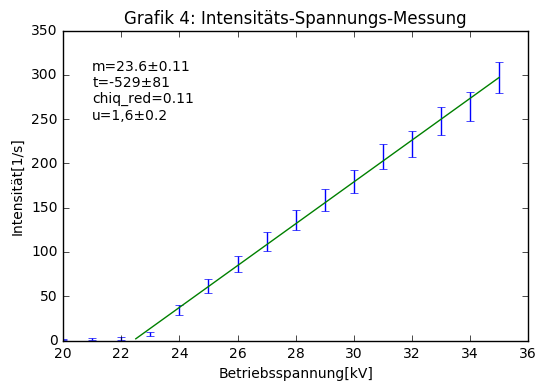

In [18]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit

U=np.array([20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35])
I=np.array([1.1,1.7,2,7.4,34.3,61.65,86.65,112.1,136.2,158.5,179.4,207.7,222.1,247.6,263.9,296.8])
fehler_I=np.sqrt(I)

plt.errorbar(U,I,fehler_I,linestyle='None')
plt.xlabel('Betriebsspannung[kV]')
plt.ylabel('Intensität[1/s]')
plt.title('Grafik 4: Intensitäts-Spannungs-Messung')

def linear(x,a,b):
    return a+b*x
x=np.linspace(22.5,35,100)
popt,pcov=curve_fit(linear,U[4:16:1],I[4:16:1],sigma=fehler_I[4:16:1])
plt.plot(x,linear(x,*popt))

print('Fitgerade=a+b*x')
print('a=',popt[0],'±',pcov[0][0])
print('b=',popt[1],'±',pcov[1][1])

chisq=np.sum((linear(U[4:16:1],*popt)-I[4:16:1])**2/fehler_I[4:16:1]**2)
dof=11
chisq_red=chisq/dof
print('chisq=',chisq)
print('chisq_red=',chisq_red)
from scipy.stats import chi2
prob=round(1-chi2.cdf(chisq,dof),2)*100
print('Fitwahrscheinlichkeit=',prob,'%')

plt.text(21,250,"m=23.6±0.11\nt=-529±81\nchiq_red=0.11\nu=1,6±0.2")
plt.savefig("/Users/Jochen/Documents/Studium/Physik/Praktikum/PAP 2.2/255 Röntgenspektrometer/Intensität-Spannung.jpeg", format="jpeg",dpi=300)